# Analyzing Stock Movement

A project I took up to understand different machine learning models better. In here, the K-Means clustering algorithm is put to use.

It attempts to group all the companies whose stock move together and understand the reasons for the same.

In [19]:
import pandas as pd

df = pd.read_csv("https://www.danielpesch.com/stocks.csv", index_col=0)

In [20]:
#df.shape
df.head()


,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [21]:
df.T.describe()

,Apple,AIG,Amazon,American express,Boeing,Bank of America,British American Tobacco,Canon,Caterpillar,Colgate-Palmolive,...,Taiwan Semiconductor Manufacturing,Texas instruments,Unilever,Valero Energy,Walgreen,Wells Fargo,Wal-Mart,Exxon,Xerox,Yahoo
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,...,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,-0.341246,-0.016272,0.164580,0.044206,0.038733,-0.019418,0.076075,0.012700,-0.025607,0.079273,...,-0.004091,0.035691,0.012565,0.003738,0.035462,0.011755,0.038733,0.043510,-0.001558,-0.000831
std,6.181568,0.793653,3.426001,0.678781,0.947419,0.223088,0.658690,0.362598,1.236689,0.734869,...,0.167167,0.398248,0.255976,0.551102,0.474825,0.442863,0.482442,0.698473,0.144362,0.287091
min,-30.119995,-4.810001,-15.160003,-2.809997,-4.989998,-1.199999,-3.040001,-2.299999,-4.849999,-3.900001,...,-0.720002,-1.349998,-1.170000,-2.789995,-1.890000,-1.770001,-1.880001,-2.930000,-0.860000,-1.529999
25%,-3.715011,-0.400000,-1.869995,-0.359998,-0.514999,-0.144999,-0.310005,-0.170001,-0.720001,-0.360001,...,-0.100000,-0.190002,-0.130001,-0.305001,-0.240001,-0.240002,-0.240004,-0.364998,-0.080000,-0.150000
50%,-0.040001,-0.029999,0.079987,0.060001,0.050003,-0.020000,0.079995,0.010003,0.009995,0.040001,...,0.000000,0.049999,0.020000,0.009999,0.029999,0.010002,0.030003,0.060005,0.000000,-0.010000
75%,2.889999,0.330002,2.245003,0.470001,0.555000,0.110000,0.460006,0.200001,0.700000,0.505001,...,0.100000,0.280001,0.170002,0.350000,0.300003,0.270001,0.324997,0.485001,0.080000,0.139999
max,30.760009,5.340000,14.630005,2.519996,3.090000,1.030000,3.790001,3.169999,4.270004,3.220001,...,0.570000,1.750002,1.150000,2.140000,2.250000,2.060002,2.029999,3.060006,0.440000,2.000000


In [22]:
df.T.corr()

,Apple,AIG,Amazon,American express,Boeing,Bank of America,British American Tobacco,Canon,Caterpillar,Colgate-Palmolive,...,Taiwan Semiconductor Manufacturing,Texas instruments,Unilever,Valero Energy,Walgreen,Wells Fargo,Wal-Mart,Exxon,Xerox,Yahoo
Apple,1.000000,0.222075,0.321521,0.286350,0.279471,0.287192,0.280223,0.314356,0.393954,0.185702,...,0.284687,0.338489,0.305770,0.238186,0.218851,0.320128,0.186187,0.314221,0.318092,0.244875
AIG,0.222075,1.000000,0.255546,0.372643,0.327863,0.474000,0.295067,0.352634,0.367236,0.205904,...,0.318726,0.333973,0.346622,0.291049,0.205041,0.455349,0.150761,0.355422,0.331851,0.235512
Amazon,0.321521,0.255546,1.000000,0.383390,0.314747,0.286123,0.293333,0.382659,0.380480,0.261791,...,0.335869,0.384318,0.368454,0.290325,0.244958,0.331062,0.182001,0.342212,0.324081,0.400845
American express,0.286350,0.372643,0.383390,1.000000,0.487622,0.550344,0.467226,0.488663,0.476635,0.353262,...,0.418751,0.413216,0.492749,0.374551,0.318258,0.592424,0.304374,0.500775,0.451757,0.345798
Boeing,0.279471,0.327863,0.314747,0.487622,1.000000,0.437251,0.443455,0.463445,0.503907,0.341735,...,0.342016,0.414735,0.483148,0.314749,0.352295,0.496367,0.266515,0.459676,0.409567,0.323104
Bank of America,0.287192,0.474000,0.286123,0.550344,0.437251,1.000000,0.411496,0.491406,0.480668,0.216178,...,0.356388,0.371904,0.470110,0.376533,0.347847,0.693295,0.276033,0.479755,0.419152,0.308355
British American Tobacco,0.280223,0.295067,0.293333,0.467226,0.443455,0.411496,1.000000,0.511066,0.476586,0.399815,...,0.388508,0.371190,0.678467,0.354594,0.301645,0.460842,0.350283,0.536046,0.392007,0.310171
Canon,0.314356,0.352634,0.382659,0.488663,0.463445,0.491406,0.511066,1.000000,0.539261,0.344345,...,0.419102,0.456631,0.543234,0.350738,0.306983,0.548466,0.275459,0.508802,0.476797,0.301327
Caterpillar,0.393954,0.367236,0.380480,0.476635,0.503907,0.480668,0.476586,0.539261,1.000000,0.297163,...,0.436084,0.517903,0.518135,0.432870,0.323301,0.502922,0.276268,0.594384,0.445193,0.298566
Colgate-Palmolive,0.185702,0.205904,0.261791,0.353262,0.341735,0.216178,0.399815,0.344345,0.297163,1.000000,...,0.218800,0.233440,0.409634,0.183544,0.302990,0.272371,0.362729,0.419304,0.262070,0.236798


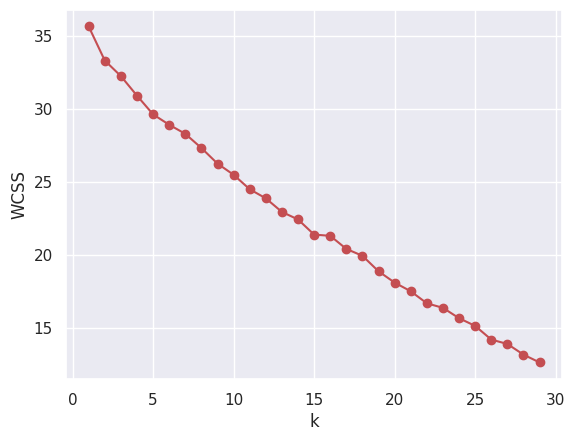

In [23]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
%matplotlib inline

number_of_clusters = range(1,30)
inertias = []

for k in number_of_clusters:
    inertias_tmp = list()
    for i in range(1, 10):
      normalizer = Normalizer()
      kmeans = KMeans(n_clusters=k)
      pipeline = make_pipeline(normalizer, kmeans)
      pipeline.fit(df)
      inertias_tmp.append(kmeans.inertia_)
    inertias.append(np.min(inertias_tmp))

plt.plot(number_of_clusters, inertias, '-or')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [24]:
companies = df.index

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

normalizer = Normalizer()
kmeans = KMeans (n_clusters=11)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(df)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=11))])

In [25]:
clusters_estimated = pipeline.predict(df)
clusters_estimated

array([ 1,  6,  4,  6,  8,  6,  7,  9,  1,  3,  7,  5,  7,  1,  7,  9,  5,
        7,  6,  7,  5,  9,  9,  7,  4,  3,  6,  3, 10,  8,  2, 10,  1,  7,
        9,  1,  8,  7, 10,  2,  3, 10,  7,  7,  1,  9,  2,  7,  9,  7,  0,
        4,  7,  1,  3,  6,  3,  7,  5,  4], dtype=int32)

In [26]:
new_df = pd.DataFrame({'company': companies, 'cluster': clusters_estimated})
new_df

,company,cluster
0,Apple,1
1,AIG,6
2,Amazon,4
3,American express,6
4,Boeing,8
5,Bank of America,6
6,British American Tobacco,7
7,Canon,9
8,Caterpillar,1
9,Colgate-Palmolive,3


In [27]:
new_df.sort_values(by='cluster')

,company,cluster
50,Taiwan Semiconductor Manufacturing,0
0,Apple,1
13,DuPont de Nemours,1
8,Caterpillar,1
35,Navistar,1
44,Schlumberger,1
32,3M,1
53,Valero Energy,1
39,Pfizer,2
46,Sanofi-Aventis,2


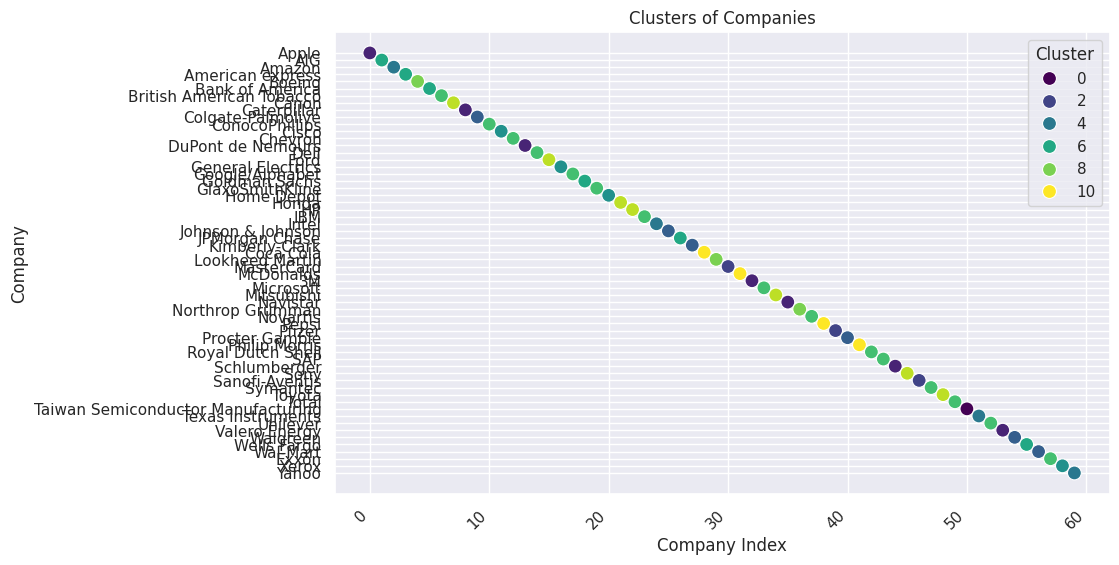

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x=new_df.index, y='company', hue='cluster', data=new_df, palette='viridis', s=100)
plt.title('Clusters of Companies')
plt.xlabel('Company Index')
plt.ylabel('Company')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.legend(title='Cluster')